# Prelab 2 Christopher Kang/cskang2

### Imports

In [1]:
import os
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from IPython.display import Audio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

### Part 1: Zero-padding and Windowing

In [2]:
print(os.getcwd())
sampling_rate, data = read('with_hum.wav')
Audio('with_hum.wav')

C:\Users\chris\Downloads\UIUC_School\ECE_420\Prelab2


Text(0.5, 1.0, 'Magnitude Response of Original Signal')

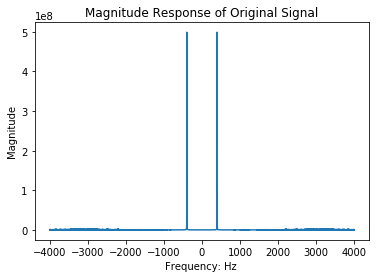

In [3]:
# FFT the original signal and plot the magnitude 
fft_1 = np.fft.fft(data)
freq_1 = np.linspace(-sampling_rate/2, sampling_rate/2, len(fft_1) )

plt.plot( freq_1, abs(np.fft.fftshift(fft_1.real) ) )
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response of Original Signal")

### Part 3: Notch Filter Design

Text(0.5, 1.0, 'Phase of Filter')

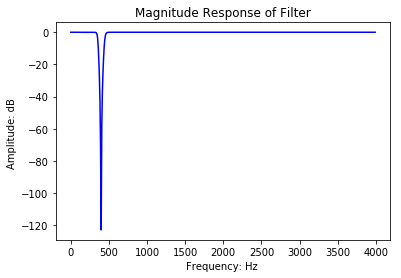

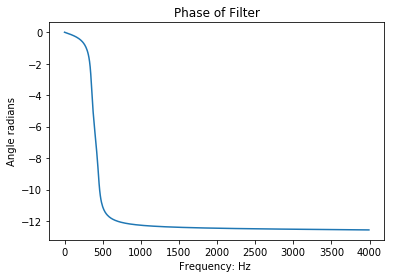

In [17]:
# Low Freq/High Freq conversion to W
low_cutoff = 350 /(sampling_rate/2)
high_cutoff = 450 /(sampling_rate/2)

# Butter Filter Design
b, a = signal.butter(N = 4, Wn = [low_cutoff, high_cutoff], btype = 'bandstop', analog = False )

#Frequency Response 
w, h = signal.freqz(b,a)

plt.plot(w * sampling_rate/ (2*np.pi), 20 * np.log10(abs(h)), 'b')
plt.xlabel("Frequency: Hz ")
plt.ylabel("Amplitude: dB ")
plt.title("Magnitude Response of Filter")

angles = np.unwrap(np.angle(h))
plt.figure()
plt.plot(w * sampling_rate/ (2*np.pi), angles )
plt.xlabel("Frequency: Hz ")
plt.ylabel("Angle radians")
plt.title("Phase of Filter")

#### Question: Brifely discribe your filter design. Why does your filter have the number of taps that it has? Could you achieve the same effect with less taps? What are the practical effects of using less taps?

- The filter is a sample bandstop filter between 350 HZ and 450 HZ with an N order of 4. This number of taps or N was chosen due to producing a clear stop region between the low/high frequencies. This will be harder to achieve with a lower N order due to the cutoff being less immediate and leaving some of the potential high pitch noise in. In general, using less taps can help save memory cost and computation time/cost for building the filter

Text(0.5, 1.0, 'Magnitude Response of Post Filter')

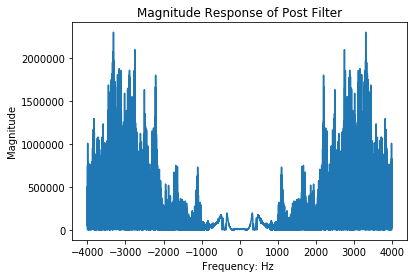

In [12]:
result = signal.lfilter(b,a, data)

fft_2 = np.fft.fft(result)
freq_2 = np.linspace(-sampling_rate/2, sampling_rate/2, len(fft_2) )

plt.plot(freq_2,abs(np.fft.fftshift(fft_2).real) )
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response of Post Filter")


### Audio Test

In [12]:
write("test.wav", sampling_rate, result.real.astype(np.float32) )
Audio("test.wav")

In [200]:
#Comparision to the non-humming audio
Audio("without_hum.wav")